In [1]:
# from ID3 import ID3
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [48]:
np.unique(y)[0]

'no-recurrence-events'

In [49]:
mode(y)

'no-recurrence-events'

In [59]:
import pandas as pd
import numpy as np
from statistics import mode
from collections import Counter

class ID3:
    def __init__(self, max_depth = 100):
        self.max_depth = max_depth

    def predict(self, X):
        pred = []
        X = X.reset_index(drop=True)
        for i in range(len(X)):
            pred.append(self.node.classify(X.iloc[i]))
        return pred#np.asarray(pred)

    def fit(self, U, y):
        assert len(U) == len(y), f"X and y must be same length X: {len(U)}, y: {len(y)}"
        self.node = self.__id3(U, y, self.max_depth)

    def __id3(self, U, y, max_depth):
        if len(np.unique(y)) == 1:
            return Leaf(np.unique(y)[0])
        if len(U.columns) == 0 or max_depth == 0:
            return Leaf(mode(y))

        dfInfGain = pd.DataFrame(columns=["column", "InfGain"])
        for col in U.columns:
            dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
            
        d = dfInfGain['column'].iloc[np.argmax(dfInfGain['InfGain'])]
        return Node(d,{unique_val: self.__id3(U.drop(columns=d)[U[d] == unique_val].copy(), y[U[d] == unique_val], max_depth - 1) for unique_val in U[d].unique()})

    def __I(self, U):
        U = U.tolist()
        freq_list = []
        I = 0

        for c in set(U):
            freq_list.append(U.count(c)/len(U))

        for i in range(len(freq_list)):
            I -= freq_list[i]*np.log(freq_list[i])
        return I

    def __Inf(self, d, U, y):
        inf = 0
        for i in range(len(U[d].unique())):
            inf += U[d].value_counts().values[i]/len(U) * self.__I(y[U[d] == U[d].unique()[i]])
        return inf

    def __InfGain(self, d, U, y):
        return self.__I(y) - self.__Inf(d,U, y)

class Leaf:
    def __init__(self, class_):
        self.class_ = class_

    def classify(self, sample):
        # print("leaf")
        print(self.class_)
        return self.class_

class Node:
    def __init__(self, attribute, children):
        self.attribute = attribute
        self.children = children

    def classify(self, sample):
        if sample[self.attribute] in self.children:
            # print("node if")
            return self.children[sample[self.attribute]].classify(sample)
        else:
            # return self.attribute, self.children
            classes = [child.classify(sample)
                       for child in self.children.values()]
            return mode(classes)
            class_counter = Counter(classes)
            print("node", class_counter.most_common(1)[0][0])
            return class_counter.most_common(1)[0][0]

In [3]:
breast = pd.read_csv("breast-cancer.csv")
X = breast.drop(columns='Class')
y = breast['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [53]:
model = ID3(max_depth = 1)
model.fit(X_train,y_train)
preds = model.predict(X_test)

recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
recurrence-events
recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-ev

C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\665470105.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\665470105.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\665470105.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\665470105.py:29: FutureWarning: The

In [45]:
type(preds[0])

str

In [46]:
type(preds[11])

numpy.ndarray

In [34]:
sample = a.iloc[11]
self = model.node

if sample[self.attribute] in self.children:
  print("if", self.children[sample[self.attribute]].classify(sample))
else:
    classes = [child.classify(sample)
                for child in self.children.values()]
    class_counter = Counter(classes)
    print("else", class_counter.most_common(1)[0][0])

['recurrence-events']
if recurrence-events


In [22]:
sample[self.attribute]

'15-17'

In [42]:
model.node.children['15-17'].classify(sample)

['recurrence-events']


array(['recurrence-events'], dtype=object)

In [35]:
model.node.classify(X_test.iloc[11])

['recurrence-events']


'recurrence-events'

In [13]:
a.iloc[11]

age              50-59
menopause         ge40
tumor-size       25-29
inv-nodes        15-17
node-caps          yes
deg-malig            3
breast           right
breast-quad    left_up
irradiat            no
Name: 11, dtype: object

In [51]:
model.node.children['50-59'].children['left_up'].children['20-24'].children[2].children['right']

In [29]:
model.node.attribute

'age'

In [12]:
model.node.children

{'40-44': <ID3.Leaf at 0x2066cc78ac0>,
 '35-39': <ID3.Leaf at 0x2066cc78c40>,
 '30-34': <ID3.Leaf at 0x2066cc78dc0>,
 '15-19': <ID3.Leaf at 0x2066cc78e20>,
 '25-29': <ID3.Leaf at 0x2066cc78400>,
 '20-24': <ID3.Leaf at 0x2066cc78e50>,
 '10-14': <ID3.Leaf at 0x2066cc78e80>,
 '45-49': <ID3.Leaf at 0x2066cc78d00>,
 '5-9': <ID3.Leaf at 0x2066cc78f70>,
 '0-4': <ID3.Leaf at 0x2066cc78490>,
 '50-54': <ID3.Leaf at 0x2066cc78640>}

In [15]:
model.node.classify(a.iloc[11])

['recurrence-events']


array(['recurrence-events'], dtype=object)

In [54]:
a = X_test.reset_index(drop=True)
preds = []

for i in range(100):
    preds.append(model.node.classify(a.iloc[i]))

recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
recurrence-events
recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-ev

IndexError: single positional indexer is out-of-bounds

In [55]:
preds

['recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 'recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 'recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 'recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 'recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 'recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 'recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 'recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 'recurrence-events',
 'no-recurrence-events',
 'recurrence-events',
 'recurrence-events',
 'no-recurrence-events',
 'recurrence-events',
 'no-recurrence-events',
 'recurrence-events',
 'no-recurrenc

In [8]:
preds[8]

IndexError: list index out of range

In [7]:
X_test

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
176,40-49,ge40,25-29,0-2,no,2,left,left_low,no
238,30-39,premeno,35-39,0-2,no,3,left,left_low,no
269,40-49,premeno,25-29,0-2,no,2,left,left_low,yes
182,40-49,premeno,25-29,0-2,no,1,right,left_low,yes
175,40-49,premeno,30-34,0-2,no,2,right,right_up,yes
...,...,...,...,...,...,...,...,...,...
65,40-49,premeno,10-14,0-2,no,1,right,left_up,no
8,40-49,premeno,50-54,0-2,no,2,left,left_low,no
147,50-59,premeno,30-34,3-5,yes,2,left,left_low,yes
282,30-39,premeno,20-24,0-2,no,3,left,left_up,yes


In [17]:
model.predict(X_test.iloc[0:10])

['no-recurrence-events',
 'no-recurrence-events',
 array(['no-recurrence-events'], dtype=object),
 'no-recurrence-events',
 'recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 'no-recurrence-events',
 array(['no-recurrence-events'], dtype=object)]

In [61]:
accuracy

[0.6947368421052632,
 0.6842105263157895,
 0.6842105263157895,
 0.7052631578947368,
 0.6526315789473685,
 0.6526315789473685,
 0.6526315789473685,
 0.6526315789473685,
 0.6526315789473685]

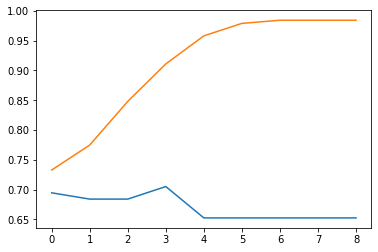

In [65]:
import matplotlib.pyplot as plt
plt.plot(accuracy_val)
plt.plot(accuracy_train)

In [64]:
accuracy_train = []
accuracy_val = []

for depth in range(1,10):
    model = ID3(max_depth = depth)
    model.fit(X_train,y_train)

    preds = model.predict(X_test)
    accuracy_val.append(accuracy_score(preds, y_test))
    preds_train = model.predict(X_train)
    accuracy_train.append(accuracy_score(preds_train, y_train))

C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning:

recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
recurrence-events
recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-ev

C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning:

recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-event

C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning:

recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
recurrence-events
recurrence-events
recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-ev

C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning:

recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
r

C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning:

recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recu

C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning:

recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recu

C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning:

recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recu

C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning:

recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recu

C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning:

recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
no-recurrence-events
recu

C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfInfGain = dfInfGain.append({"column": col, "InfGain": self.__InfGain(col, U, y)}, ignore_index=True)
C:\Users\QbaSo\AppData\Local\Temp\ipykernel_15412\1675794238.py:29: FutureWarning: